### 參考資料
Ref ：https://blog.csdn.net/FrankieHello/article/details/86770852

### 初始化股票編號、股票中文名稱對照

In [1]:
stock_no = { 0: 1101, 1: 1216, 2: 1301, 3: 1303, 4: 1326, 5: 1590, 6: 2002, 7: 2207, 8: 2303, 9: 2308
          , 10: 2317, 11: 2327, 12: 2330, 13: 2357, 14: 2379, 15: 2382, 16: 2395, 17: 2408, 18: 2409
          , 19: 2412, 20: 2454, 21: 2603, 22: 2609, 23: 2615, 24: 2801, 25: 2880, 26: 2881, 27: 2882
          , 28: 2884, 29: 2885, 30: 2886, 31: 2887, 32: 2891, 33: 2892, 34: 2912, 35: 3008, 36: 3034
          , 37: 3037, 38: 3045, 39: 3711, 40: 4904, 41: 4938, 42: 5871, 43: 5876, 44: 5880, 45: 6415
          , 46: 6505, 47: 8046, 48: 8454, 49: 9910}

stock_chinese_name = { 1101 : "台泥", 1216 : "統一", 1301 : "台塑", 1303 : "南亞", 1326 : "台化", 1590 : "亞德客-KY", 
                      2002 : "中鋼", 2207 : "和泰車", 2303 : "聯電", 2308 : "台達電", 2317 : "鴻海", 2327 : "國巨", 
                      2330 : "台積電", 2357 : "華碩", 2379 : "瑞昱", 2382 : "廣達", 2395 : "研華", 2408 : "南亞科技", 
                      2409 : "友達", 2412 : "中華電", 2454 : "聯發科", 2603 : "長榮", 2609 : "陽明", 2615 : "萬海", 
                      2801 : "彰銀", 2880 : "華南金", 2881 : "富邦金", 2882 : "國泰金", 2884 : "玉山金", 2885 : "元大金", 
                      2886 : "兆豐金", 2887 : "台新金", 2891 : "中信金", 2892 : "第一金", 2912 : "統一超", 3008 : "大立光", 
                      3034 : "聯詠", 3037 : "欣興", 3045 : "台灣大哥大", 3711 : "日月光投控", 4904 : "遠傳", 4938 : "和碩", 
                      5871 : "中租", 5876 : "上海商銀", 5880 : "合庫金", 6415 : "矽力-KY", 6505 : "台塑石化", 8046 : "南電",
                      8454 : "富邦媒體", 9910 : "豐泰"}


In [2]:
#載入pandas
import pandas as pd

#載入資料檔
df = pd.read_csv('/Users/xueyichen/Desktop/0050/total.csv')

#將第一行（col）轉變爲Index
df.set_index('Index',inplace = True)

In [3]:
#檢查是否有缺漏值
df.isnull().values.any()

False

<AxesSubplot:xlabel='Index'>

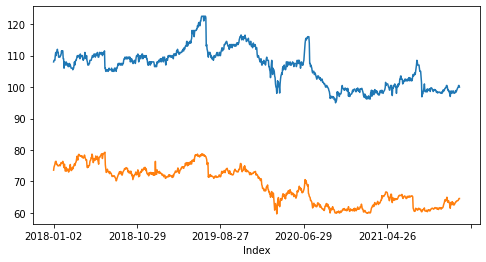

In [41]:
import matplotlib.pyplot as plt

df.iloc[:, 38].plot(figsize=(8,4))
df.iloc[:, 40].plot(figsize=(8,4))

<AxesSubplot:xlabel='Index'>

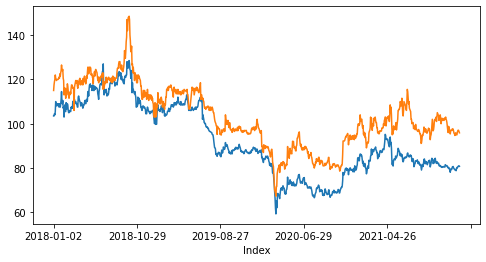

In [16]:
import matplotlib.pyplot as plt

df.iloc[:, 4].plot(figsize=(8,4))
df.iloc[:, 46].plot(figsize=(8,4))

<AxesSubplot:xlabel='Index'>

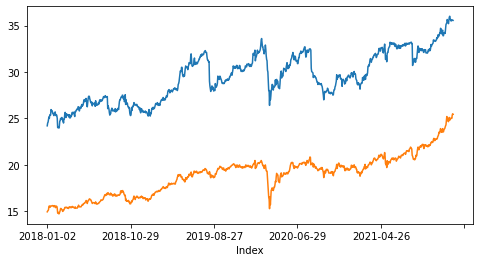

In [49]:
import matplotlib.pyplot as plt

df.iloc[:, 30].plot(figsize=(8,4))
df.iloc[:, 44].plot(figsize=(8,4))

<AxesSubplot:xlabel='Index'>

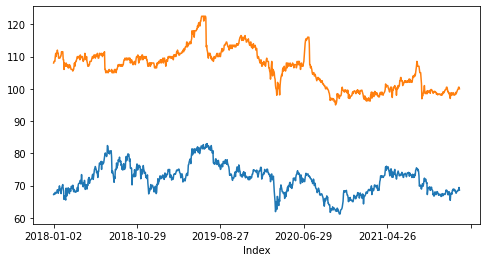

In [17]:
import matplotlib.pyplot as plt

df.iloc[:, 1].plot(figsize=(8,4))
df.iloc[:, 38].plot(figsize=(8,4))

### 檢查一次差分後，做完adf檢驗所產出的p value是否小於0.05

* price_diff = 差分後結果

* 將做ADF後的結果儲存至adf_result

In [8]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

adf_result={}

for i in range(0,50):
    
    df1 = df.iloc[:, i]
    
    price = np.reshape(df1,-1)
    
    price_diff = np.diff(price)
    
    adf_result[i] = adfuller(price_diff)

### 刪除p-value < 0.05 的股票

### 50支股票的adf都滿足一階單整，p-value全部小於0.05

In [9]:
for r in adf_result :
    if adf_result.get(r)[1] > 0.05 :
        print(adf_result.get(r))

print(len(adf_result.keys()) < 50)

False


In [14]:
pair = []

for i in range(0,49):
    for j in range(i+1,50):
        
        result = adfuller(df.iloc[:, i] - df.iloc[:, j])
        if result[1] < 0.05 and result[0] < result[4].get("1%"):
            pair.append([i,j,result])
        

In [15]:
print(len(pair))

for i in range(len(pair)) :
    #print(pair[i])
    if pair[i][0] == 10 and pair[i][1] == 11:
        print(pair[i])
    print(f'{stock_chinese_name.get(stock_no.get(pair[i][0]))} & {stock_chinese_name.get(stock_no.get(pair[i][1]))}')

10
統一 & 台灣大哥大
台化 & 台塑石化
中華電 & 華南金
中華電 & 兆豐金
中華電 & 台新金
中華電 & 中信金
中華電 & 第一金
中華電 & 合庫金
欣興 & 中租
台灣大哥大 & 遠傳


### 另一範例
Ref : https://www.programcreek.com/python/?code=PacktPublishing%2FLearn-Algorithmic-Trading%2FLearn-Algorithmic-Trading-master%2FChapter4%2Fch4_pairs_correlation_init.py

In [10]:
from statsmodels.tsa.stattools import coint
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.02:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs 


In [11]:
a,b = find_cointegrated_pairs(df)

e = [(n[0][1:5],n[1][1:5]) for n in b ]
print(len(e))
for names in e :
    print(f'{stock_chinese_name.get(int(names[0]))} & {stock_chinese_name.get(int(names[1]))}')

27
統一 & 台灣大哥大
台化 & 台塑石化
華碩 & 友達
廣達 & 聯發科
中華電 & 聯發科
中華電 & 長榮
中華電 & 陽明
中華電 & 萬海
中華電 & 富邦金
中華電 & 元大金
中華電 & 兆豐金
中華電 & 台新金
中華電 & 中信金
中華電 & 第一金
中華電 & 聯詠
中華電 & 欣興
中華電 & 日月光投控
中華電 & 中租
中華電 & 合庫金
中華電 & 矽力-KY
中華電 & 南電
中華電 & 富邦媒體
中華電 & 豐泰
萬海 & 富邦金
兆豐金 & 第一金
第一金 & 合庫金
中租 & 南電


### 以兩兩一對股票開始計算協整性

In [12]:
from statsmodels.tsa.stattools import coint

#儲存結果的list
coint_arr=[]

#兩兩計算協整性 
#first,second = 股票編號
#df.iloc = 獲取 column 的全部資料
for first in range(0,50-1):
    
    for second in range(first+1,50) :
        
        res = coint(df.iloc[:, first],df.iloc[:, second])
        coint_arr.append([first,second,res])
        
print("executed")

executed


### 找出p-value < 0.05 且t-stats < 5%置信度

In [13]:
p_value_005 = [n for n in coint_arr if n[2][1] < 0.05 and n[2][0] < n[2][2][1]]
print(f'共有{len(p_value_005)}個組合')

共有60個組合


### 顯示股票配對

In [14]:
for k in range(0,len(p_value_005)):
    stock1 = stock_no.get(p_value_005[k][0])
    stock2 = stock_no.get(p_value_005[k][1])
    print(f'{stock_chinese_name.get(stock1)} \t {stock_chinese_name.get(stock2)} \n')

台泥 	 瑞昱 

台泥 	 研華 

台泥 	 聯詠 

統一 	 亞德客-KY 

統一 	 廣達 

統一 	 研華 

統一 	 聯發科 

統一 	 台灣大哥大 

統一 	 遠傳 

統一 	 和碩 

台化 	 和泰車 

台化 	 台塑石化 

亞德客-KY 	 聯發科 

中鋼 	 陽明 

中鋼 	 萬海 

台達電 	 聯詠 

國巨 	 和碩 

國巨 	 上海商銀 

華碩 	 友達 

瑞昱 	 廣達 

瑞昱 	 研華 

廣達 	 聯發科 

廣達 	 統一超 

廣達 	 聯詠 

中華電 	 聯發科 

中華電 	 長榮 

中華電 	 陽明 

中華電 	 萬海 

中華電 	 華南金 

中華電 	 富邦金 

中華電 	 國泰金 

中華電 	 玉山金 

中華電 	 元大金 

中華電 	 兆豐金 

中華電 	 台新金 

中華電 	 中信金 

中華電 	 第一金 

中華電 	 聯詠 

中華電 	 欣興 

中華電 	 日月光投控 

中華電 	 中租 

中華電 	 合庫金 

中華電 	 矽力-KY 

中華電 	 南電 

中華電 	 富邦媒體 

中華電 	 豐泰 

長榮 	 萬海 

長榮 	 富邦金 

長榮 	 中租 

陽明 	 富邦金 

萬海 	 富邦金 

兆豐金 	 第一金 

第一金 	 欣興 

第一金 	 合庫金 

統一超 	 聯詠 

統一超 	 遠傳 

統一超 	 豐泰 

欣興 	 中租 

台灣大哥大 	 遠傳 

中租 	 南電 



### 找出p-value < 0.01 且t-stats < 5%置信度

In [15]:
p_value_002 = [n for n in coint_arr if n[2][1] < 0.02 and n[2][0] < n[2][2][1]]
print(f'共有{len(p_value_002)}個組合')

共有27個組合


### 顯示股票配對

In [16]:
for k in range(0,len(p_value_002)):
    stock1 = stock_no.get(p_value_002[k][0])
    stock2 = stock_no.get(p_value_002[k][1])
    print(f'{stock_chinese_name.get(stock1)} \t {stock_chinese_name.get(stock2)} \n')

統一 	 台灣大哥大 

台化 	 台塑石化 

華碩 	 友達 

廣達 	 聯發科 

中華電 	 聯發科 

中華電 	 長榮 

中華電 	 陽明 

中華電 	 萬海 

中華電 	 富邦金 

中華電 	 元大金 

中華電 	 兆豐金 

中華電 	 台新金 

中華電 	 中信金 

中華電 	 第一金 

中華電 	 聯詠 

中華電 	 欣興 

中華電 	 日月光投控 

中華電 	 中租 

中華電 	 合庫金 

中華電 	 矽力-KY 

中華電 	 南電 

中華電 	 富邦媒體 

中華電 	 豐泰 

萬海 	 富邦金 

兆豐金 	 第一金 

第一金 	 合庫金 

中租 	 南電 



### 找出p-value < 0.01 且t-stats < 1%置信度

In [17]:
p_value_001 = [n for n in coint_arr if n[2][1] < 0.01 and n[2][0] < n[2][2][0]]
print(f'共有{len(p_value_001)}個組合')

共有14個組合


### 顯示股票配對

In [52]:
for k in range(0,len(p_value_001)):
    stock1 = stock_no.get(p_value_001[k][0])
    stock2 = stock_no.get(p_value_001[k][1])
    print(f'{stock_chinese_name.get(stock1)} \t {stock_chinese_name.get(stock2)} \n')

統一 	 台灣大哥大 

台化 	 台塑石化 

華碩 	 友達 

中華電 	 長榮 

中華電 	 陽明 

中華電 	 萬海 

中華電 	 兆豐金 

中華電 	 中信金 

中華電 	 第一金 

中華電 	 欣興 

中華電 	 日月光投控 

中華電 	 中租 

兆豐金 	 第一金 

中租 	 南電 

